In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings("ignore")

rcParams['figure.figsize'] = (18, 12)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True

COLORS = ['#99d594', '#D53E4F', '#FC8D59']

In [ ]:
df = pd.read_csv('marketing_campaign_data.csv')
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
518,518,4607,1959,S1,Bertunangan,71367000.0,0,0,23-08-2013,24,...,2,0,0,0,0,0,0,3,11,0
2162,2162,977,1957,S1,Bertunangan,47320000.0,0,1,01-08-2013,10,...,6,0,0,0,0,0,0,3,11,0
44,44,2139,1975,S2,Menikah,7500000.0,1,0,02-10-2013,19,...,5,0,0,0,0,0,0,3,11,0
1346,1346,10390,1959,D3,Menikah,26887000.0,0,1,10-02-2013,27,...,6,0,0,0,0,0,0,3,11,0
1096,1096,4790,1958,S1,Cerai,79803000.0,0,1,02-06-2014,54,...,1,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
def getMonth(s):
  return s.split("-")[1]

def getYear(s):
  return s.split("-")[2]

df['Year']= df['Dt_Customer'].apply(lambda x: getYear(x))
df['Month']= df['Dt_Customer'].apply(lambda x: getMonth(x))

df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='Dt_Customer', inplace=True)

df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month
2072,5517,1969,S1,Menikah,25293000.0,1,0,51,15000,0,...,0,0,0,0,0,3,11,0,2013,09
1782,9645,1968,S1,Menikah,64590000.0,0,0,98,920000,138000,...,0,0,0,0,0,3,11,0,2012,10
1383,4345,1964,D3,Lajang,NaN,1,1,49,5000,1000,...,0,0,0,0,0,3,11,0,2014,01
997,11188,1957,S1,Bertunangan,26091000.0,1,1,84,15000,10000,...,0,0,0,0,0,3,11,0,2014,02
690,7230,1960,S3,Cerai,50611000.0,0,1,98,459000,0,...,1,0,0,0,0,3,11,1,2012,10


In [ ]:
categorical = [
    'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'Complain', 'Response', 'Z_CostContact', 'Z_Revenue', 'Month', 'Year', 'Response'
]

numerical = [
    'ID', 'Year_Birth', 'Income', 'Recency', 'MntCoke', 
    'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases',
    'NumWebVisitsMonth'
    
]

# EDA

In [ ]:
desc_cats = df[categorical].astype(str).describe().T
desc_cats['frac_top'] = desc_cats['freq']*100/df.shape[0]
desc_cats

,count,unique,top,freq,frac_top
Education,2240,5,S1,1127,50.3125
Marital_Status,2240,6,Menikah,864,38.571429
Kidhome,2240,3,0,1293,57.723214
Teenhome,2240,3,0,1158,51.696429
AcceptedCmp3,2240,2,0,2077,92.723214
AcceptedCmp4,2240,2,0,2073,92.544643
AcceptedCmp5,2240,2,0,2077,92.723214
AcceptedCmp1,2240,2,0,2096,93.571429
AcceptedCmp2,2240,2,0,2210,98.660714
Complain,2240,2,0,2219,99.0625


In [ ]:
desc_num = df[numerical].describe().round(3).T

for i, col in enumerate(numerical):
    desc_num.loc[col, 'no_unique'] = df[col].nunique()

desc_num['no_unique'] = desc_num['no_unique'].astype(int)
desc_num

,count,mean,std,min,25%,50%,75%,max,no_unique
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0,2240
Year_Birth,2240.0,1.968806e+03,1.198400e+01,1893.0,1959.00,1970.0,1977.00,1996.0,59
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0,1974
Recency,2240.0,4.910900e+01,2.896200e+01,0.0,24.00,49.0,74.00,99.0,100
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0,776
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0,158
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0,558
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0,182
MntSweetProducts,2240.0,2.706295e+04,4.128050e+04,0.0,1000.00,8000.0,33000.00,263000.0,177
MntGoldProds,2240.0,4.402188e+04,5.216744e+04,0.0,9000.00,24000.0,56000.00,362000.0,213


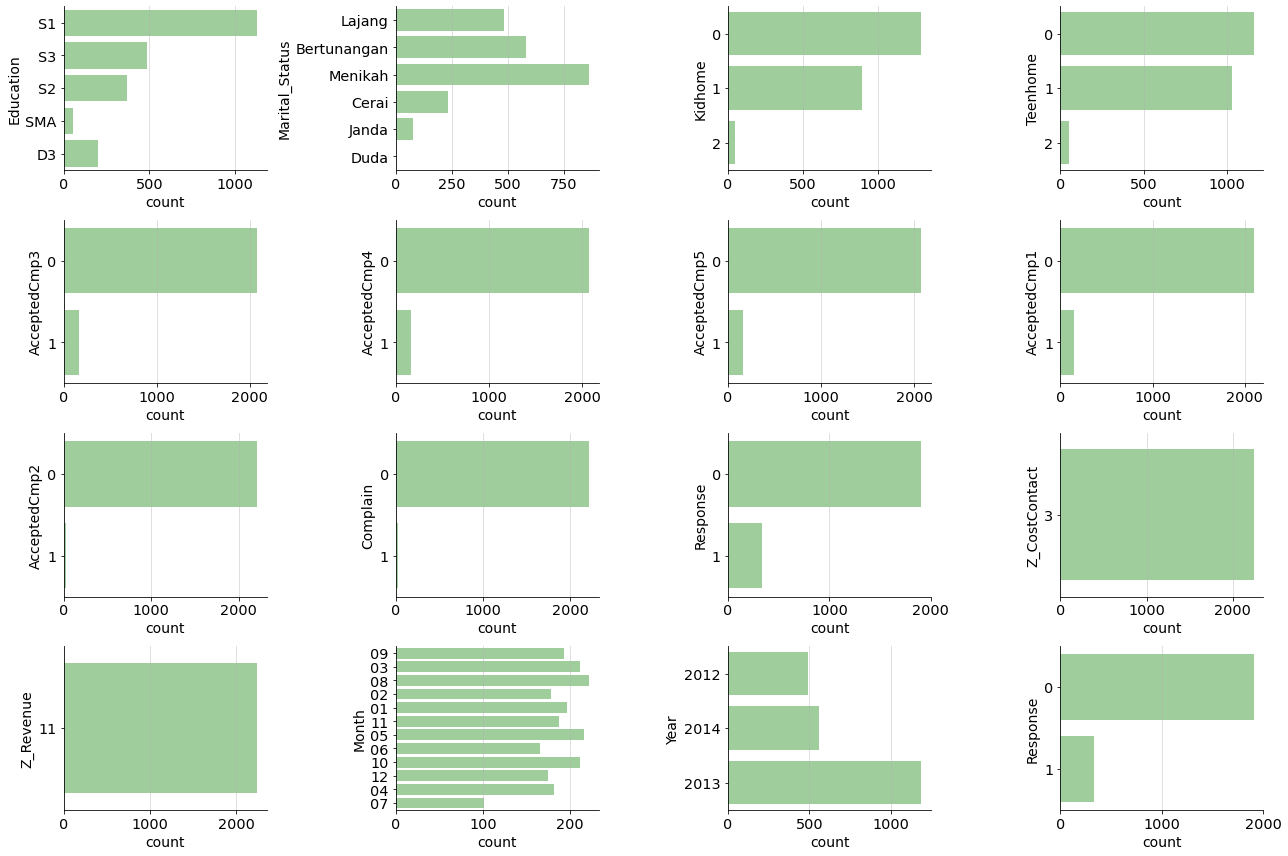

In [ ]:
for i, col in enumerate(categorical):
    plt.subplot(4, 4, i+1)
    sns.countplot(
        y=df[col],
        color=COLORS[0],
        orient='v'
    )
    plt.xlabel("count", fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()

plt.show()

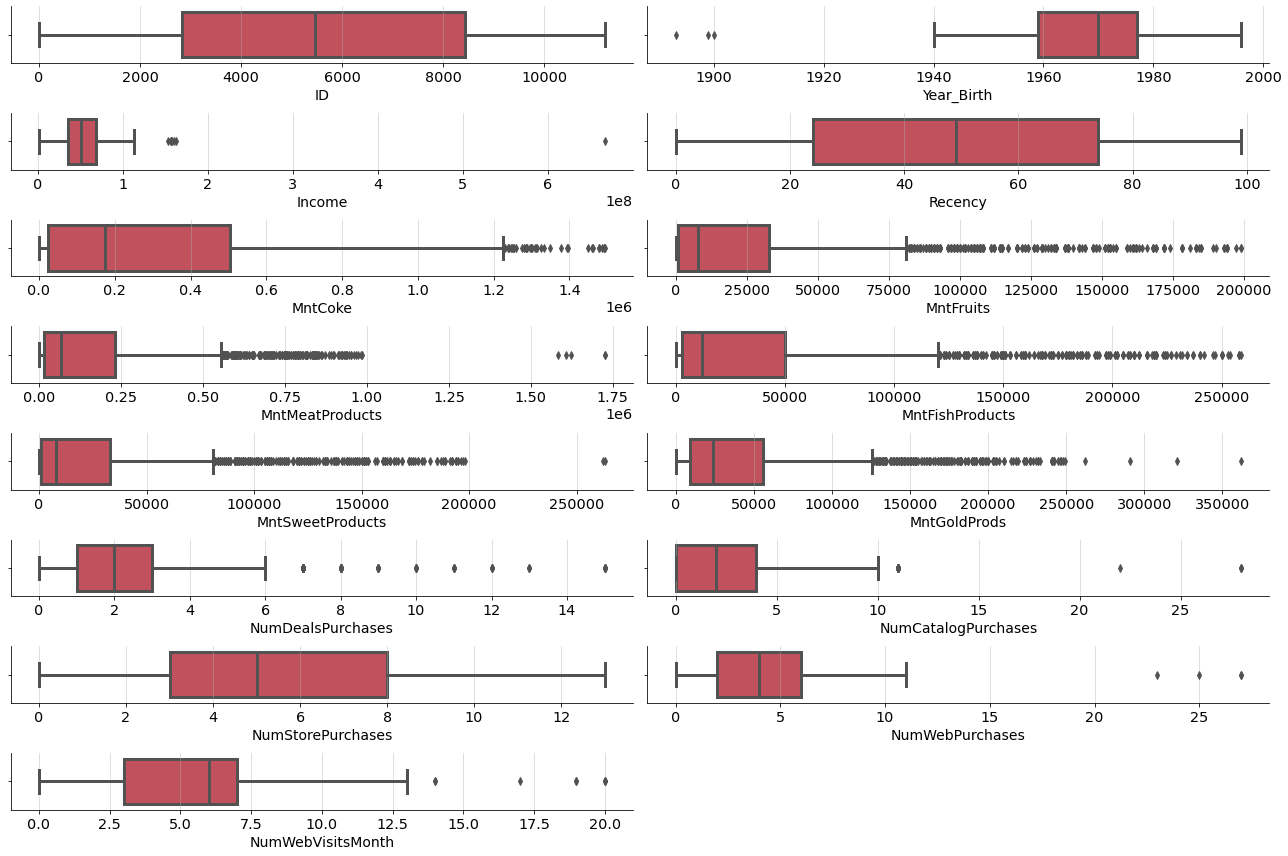

In [ ]:
for i, col in enumerate(numerical):
    plt.subplot(8, 2, i+1)            
    sns.boxplot(
        x=df[col], 
        color=COLORS[1], 
        orient='h'
    )
    plt.xlabel(col, fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.tight_layout()

plt.show() 

In [ ]:
df['Age'] = date.today().year - df['Year_Birth']
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Total_Transactions'] = df['MntCoke'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Conversion_Rate'] = df['Response']/df['NumWebVisitsMonth']

df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,Z_CostContact,Z_Revenue,Response,Year,Month,Age,Kids,Total_Transactions,Total_Purchases,Conversion_Rate
1191,8732,1969,S2,Janda,67369000.0,0,1,81,1298000,0,...,3,11,1,2012,11,53,1,1461000,21,0.25
1230,6230,1971,S1,Cerai,44421000.0,1,1,53,110000,5000,...,3,11,0,2013,02,51,2,189000,9,0.00
2111,1008,1981,S3,Bertunangan,44953000.0,0,0,31,728000,17000,...,3,11,0,2012,12,41,0,1021000,23,0.00
1494,2005,1990,S1,Menikah,35765000.0,1,0,86,22000,3000,...,3,11,0,2013,12,32,1,75000,6,0.00
174,641,1967,S1,Lajang,52074000.0,0,1,77,59000,0,...,3,11,0,2014,04,55,1,119000,6,0.00


In [ ]:
#reference: https://www.statcan.gc.ca/en/concepts/definitions/age2
def age_range(row):
    if (row >= 0) & (row < 14):
        return 'Children'
    if (row >= 14) & (row < 24):
        return 'Youth'
    if (row >= 24) & (row < 64):
        return 'Adult'
    if (row >= 64):
        return 'Seniors'
        
df['Age_Range'] = df['Age'].apply(age_range)
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,Z_Revenue,Response,Year,Month,Age,Kids,Total_Transactions,Total_Purchases,Conversion_Rate,Age_Range
325,7214,1957,S1,Menikah,62187000.0,0,0,49,792000,0,...,11,0,2013,07,65,0,1283000,17,0.000,Seniors
1874,4796,1952,S1,Cerai,49638000.0,0,1,71,18000,10000,...,11,0,2014,04,70,1,39000,4,0.000,Seniors
1178,2918,1981,S1,Cerai,28510000.0,1,1,72,44000,5000,...,11,0,2013,04,41,2,91000,6,0.000,Adult
2123,4915,1956,D3,Menikah,53230000.0,0,1,86,176000,72000,...,11,0,2012,08,66,1,732000,19,0.000,Seniors
1116,3885,1983,S3,Menikah,33569000.0,1,0,10,16000,2000,...,11,1,2013,10,39,1,63000,4,0.125,Adult


In [ ]:
def relationship_status(row):
        if row in ['Bertunangan', 'Menikah']:
            return True
        if row in ['Lajang','Cerai', 'Janda', 'Duda']:
            return False
    
df['In_Relationship'] = df['Marital_Status'].apply(relationship_status)
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,Response,Year,Month,Age,Kids,Total_Transactions,Total_Purchases,Conversion_Rate,Age_Range,In_Relationship
2075,10281,1970,S1,Cerai,64713000.0,1,0,11,180000,60000,...,1,2014,02,52,1,602000,17,0.25,Adult,False
592,4501,1965,S2,Lajang,69882000.0,0,0,94,292000,127000,...,0,2013,11,57,0,1478000,19,0.00,Adult,False
1984,1406,1975,S1,Lajang,53201000.0,1,1,49,280000,7000,...,0,2013,02,47,2,415000,14,0.00,Adult,False
1118,880,1966,SMA,Bertunangan,22634000.0,0,0,47,2000,23000,...,0,2013,01,56,0,96000,5,0.00,Adult,True
112,3267,1963,S2,Bertunangan,57288000.0,0,1,27,527000,0,...,0,2014,06,59,1,608000,17,0.00,Adult,True


In [ ]:
df.duplicated().sum()

0

In [ ]:
over_income = df['Income']>150000000
df[over_income]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,Response,Year,Month,Age,Kids,Total_Transactions,Total_Purchases,Conversion_Rate,Age_Range,In_Relationship
164,8475,1973,S3,Menikah,157243000.0,0,1,98,20000,2000,...,0,2014,03,49,1,1608000,22,NaN,Adult,True
617,1503,1976,S3,Bertunangan,162397000.0,1,1,31,85000,1000,...,0,2013,06,46,2,107000,1,0.0,Adult,True
655,5555,1975,S1,Cerai,153924000.0,0,0,81,1000,1000,...,0,2014,02,47,0,6000,0,NaN,Adult,False
687,1501,1982,S3,Menikah,160803000.0,0,0,21,55000,16000,...,0,2012,08,40,0,1717000,29,NaN,Adult,True
1300,5336,1971,S2,Bertunangan,157733000.0,1,0,37,39000,1000,...,0,2013,06,51,1,59000,2,0.0,Adult,True
1653,4931,1977,S1,Bertunangan,157146000.0,0,0,13,1000,0,...,0,2013,04,45,0,1730000,28,0.0,Adult,True
2132,11181,1949,S3,Menikah,156924000.0,0,0,85,2000,1000,...,0,2013,08,73,0,8000,0,NaN,Seniors,True
2233,9432,1977,S1,Bertunangan,666666000.0,1,0,23,9000,14000,...,0,2013,06,45,1,62000,7,0.0,Adult,True


In [ ]:
too_old = df['Year_Birth']<1940
df[too_old]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,Response,Year,Month,Age,Kids,Total_Transactions,Total_Purchases,Conversion_Rate,Age_Range,In_Relationship
192,7829,1900,D3,Cerai,36640000.0,1,0,99,15000,6000,...,0,2013,09,122,1,65000,5,0.0,Seniors,False
239,11004,1893,D3,Lajang,60182000.0,0,1,23,8000,0,...,0,2014,05,129,1,22000,3,0.0,Seniors,False
339,1150,1899,S3,Bertunangan,83532000.0,0,0,36,755000,144000,...,0,2013,09,123,0,1853000,14,0.0,Seniors,True


In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

df.drop(columns='Z_CostContact', inplace=True)
df.drop(columns='Z_Revenue', inplace=True)
df = df.dropna()
df = df.loc[(~over_income)].copy()
df = df.loc[~too_old].reset_index(drop=True).copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2222 non-null   int64  
 1   Year_Birth           2222 non-null   int64  
 2   Education            2222 non-null   object 
 3   Marital_Status       2222 non-null   object 
 4   Income               2222 non-null   float64
 5   Kidhome              2222 non-null   int64  
 6   Teenhome             2222 non-null   int64  
 7   Recency              2222 non-null   int64  
 8   MntCoke              2222 non-null   int64  
 9   MntFruits            2222 non-null   int64  
 10  MntMeatProducts      2222 non-null   int64  
 11  MntFishProducts      2222 non-null   int64  
 12  MntSweetProducts     2222 non-null   int64  
 13  MntGoldProds         2222 non-null   int64  
 14  NumDealsPurchases    2222 non-null   int64  
 15  NumWebPurchases      2222 non-null   i

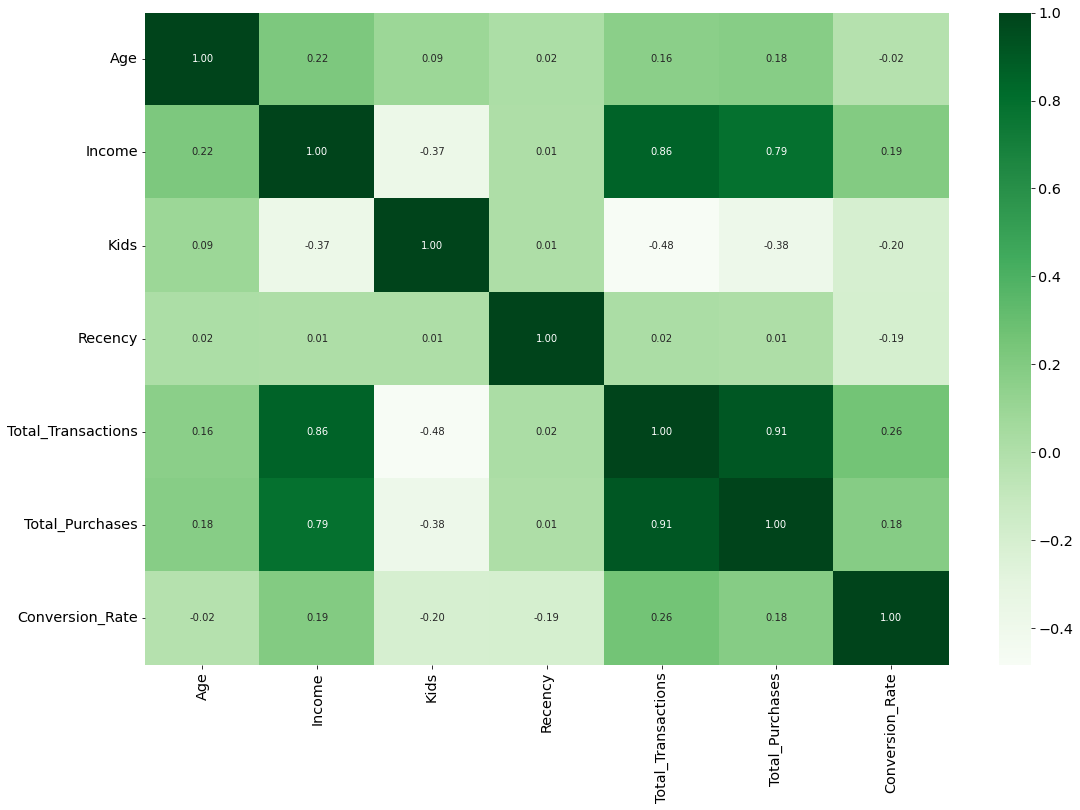

In [ ]:
df_plot = [
    'Education', 'Marital_Status', 'Age', 'Income', 'Kids', 'Recency',
    'Total_Transactions', 'Total_Purchases', 'Conversion_Rate'
]

df_corr = df[df_plot].corr(method='spearman')

sns.heatmap(df_corr, cmap='Greens', annot=True, fmt='.2f')

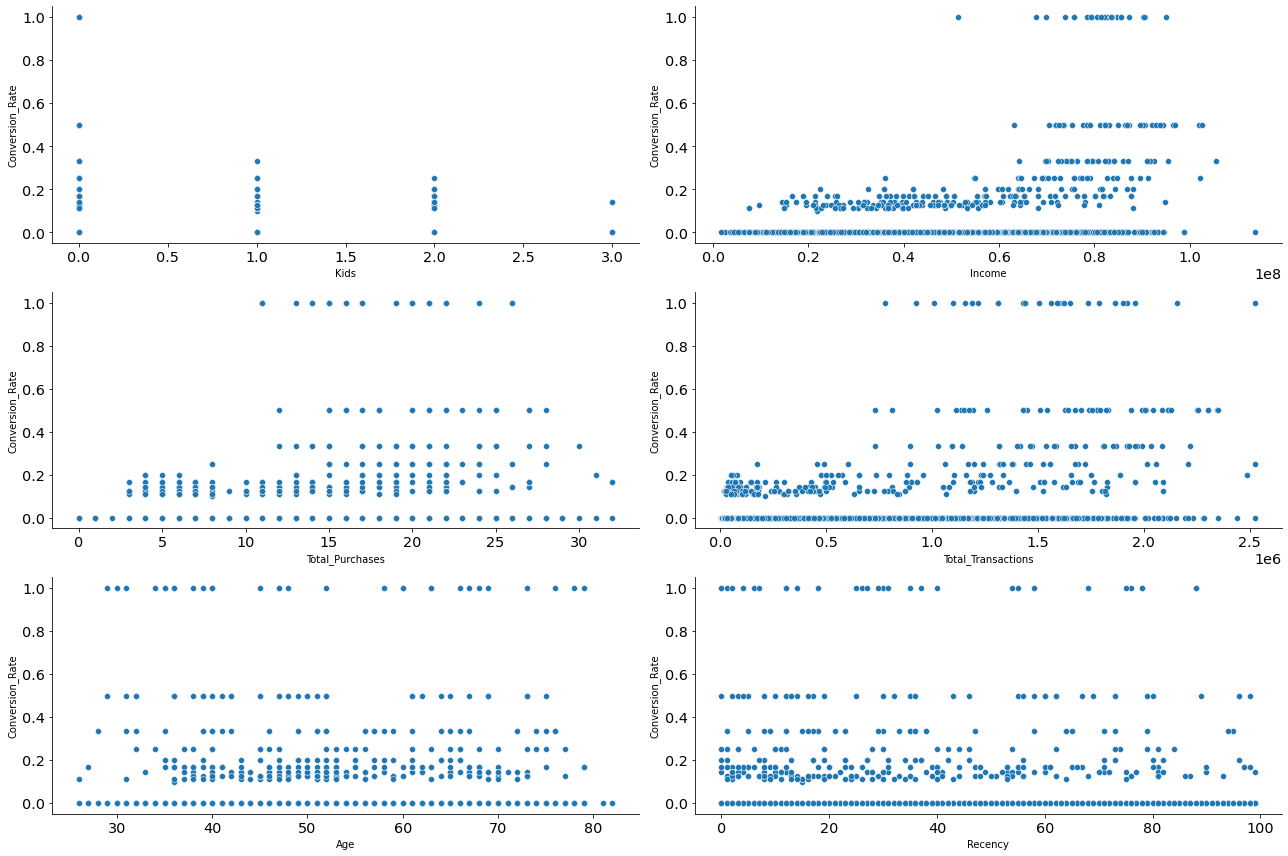

In [ ]:
corr = ['Kids', 'Income', 'Total_Purchases', 'Total_Transactions', 'Age', 'Recency']

for i in range(0, len(corr)):
    plt.subplot(3, 2, i+1) 
    sns.scatterplot(data=df, y='Conversion_Rate', x=corr[i])
    plt.tight_layout()

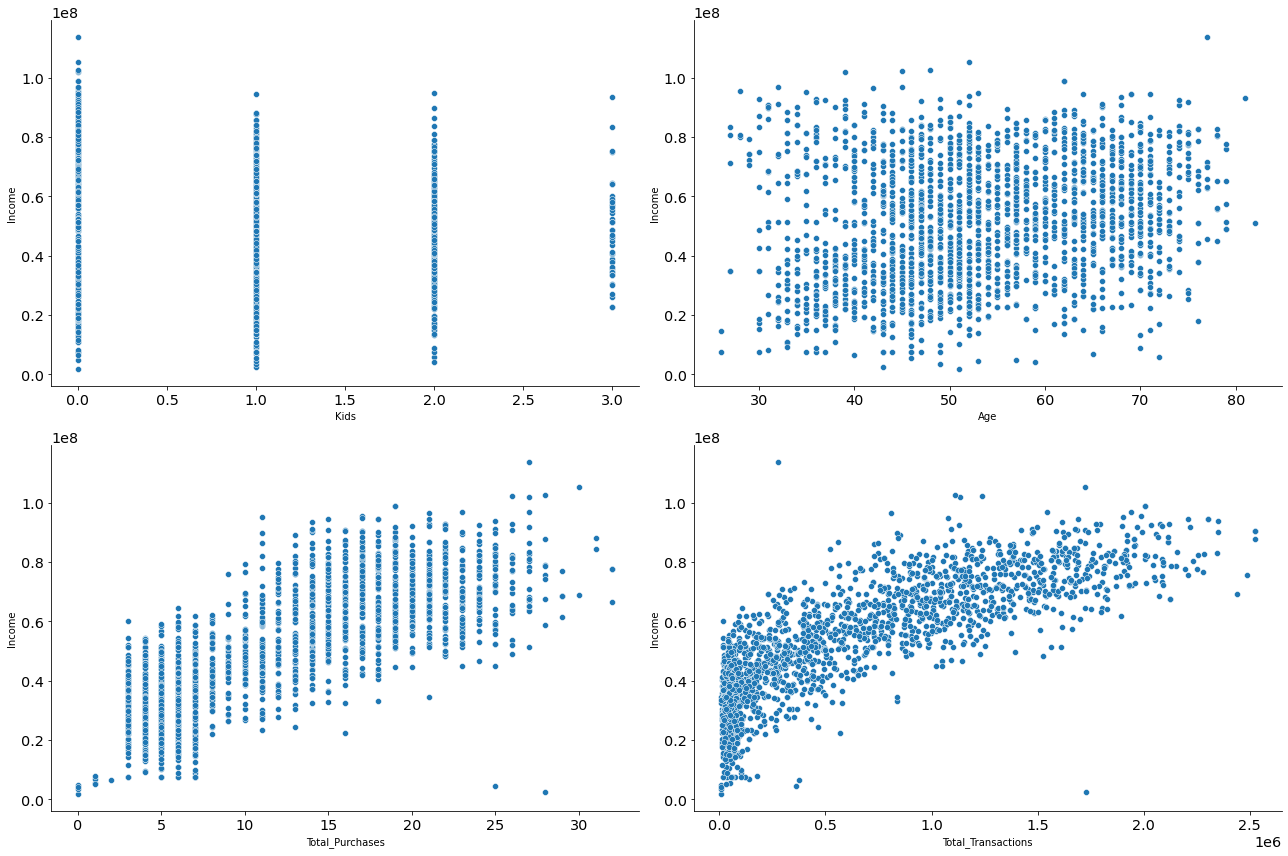

In [ ]:
corr1 = ['Kids', 'Age', 'Total_Purchases', 'Total_Transactions']

for i in range(0, len(corr1)):
    plt.subplot(2, 2, i+1) 
    sns.scatterplot(data=df, y='Income', x=corr1[i])
    plt.tight_layout()